In [6]:
import numpy as np
import pandas as pd
from numpy import corrcoef
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
sns.set(style="darkgrid")


#praticamente uguale a tables ma con dati aggiornati e nuove features

In [29]:
# Read the Cleaned Data
data = pd.read_csv('../data/Data/data.csv')
malidataidps = pd.read_csv('../data/Data/malidataidps.csv')

mopti = ['Bandiagara','Bankass','Djenne','Douentza','Koro','Mopti','Tenenkou','Youwarou']
tombouctou = ['Dire','Goundam','Gourma-Rharous','Niafunke','Tombouctou']
gao = ['Ansongo','Bourem','Gao','Menaka']
nord = ['Loroum','Yatenga']
sahel = ['Oudalan','Seno','Soum','Yagha']
est = ['Komonjdjari']
tahoua = ['Tahoua','Tassara','Tillia']
tillaberi = ['Banibangou','Filingue','Kollo','Ouallam','Say','Tera','Tillaberi']

# DATA CHAPTER

In [23]:
m35 = pd.DataFrame({'mean35' :data.groupby(['adm0_name','reference_year'])['phase35'].mean()})
popm = pd.DataFrame({'pop_mean' :data.groupby(['adm0_name','reference_year'])['population'].mean()})
#questo denm chiaramente è sbagliato matematicamente ma lo ricalcoliamo giusto in density_m
denm = pd.DataFrame({'density_mean' :data.groupby(['adm0_name','reference_year'])['p35_density'].mean()})


m35.reset_index(inplace=True)
popm.reset_index(inplace=True)
denm.reset_index(inplace=True)


denm['density_m'] = m35['mean35'] / popm['pop_mean']
denm

,adm0_name,reference_year,density_mean,density_m
0,Burkina Faso,2014,0.114286,0.103208
1,Burkina Faso,2015,0.101429,0.113327
2,Burkina Faso,2016,0.061429,0.053722
3,Burkina Faso,2017,0.055714,0.047128
4,Burkina Faso,2018,0.112000,0.103922
5,Burkina Faso,2019,0.137143,0.121651
6,Burkina Faso,2020,0.275714,0.279406
7,Mali,2014,0.264000,0.239828
8,Mali,2015,0.090667,0.067081
9,Mali,2016,0.058000,0.046826


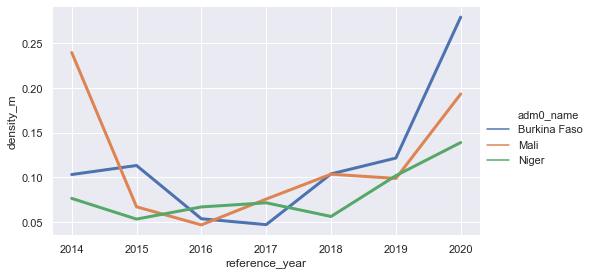

In [24]:
#adm0 Percentage of food insecure people per country each year
sns.relplot(x="reference_year", y="density_m", hue="adm0_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=denm);

In [25]:
prices = pd.DataFrame({'a_price' :data.groupby(['adm0_name','reference_year'])['actual_price'].mean()})
prices['variation'] = pd.DataFrame({'variation' :data.groupby(['adm0_name','reference_year'])['diff_price'].mean()})
prices.reset_index(inplace=True)
prices

,adm0_name,reference_year,a_price,variation
0,Burkina Faso,2014,214.545714,5.870000
1,Burkina Faso,2015,200.817143,13.865714
2,Burkina Faso,2016,200.587143,14.092857
3,Burkina Faso,2017,232.490000,17.808571
4,Burkina Faso,2018,247.837143,33.155714
5,Burkina Faso,2019,198.901429,15.772857
6,Burkina Faso,2020,202.137143,12.542857
7,Mali,2014,197.624000,21.188000
8,Mali,2015,188.237333,30.576667
9,Mali,2016,191.560000,27.252000


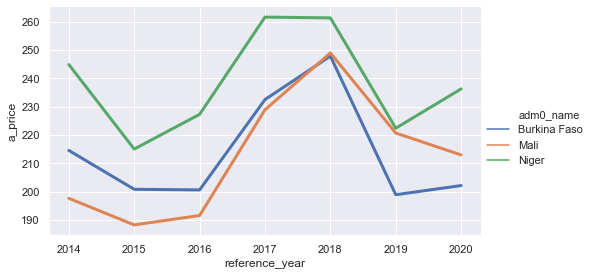

In [26]:
#adm0 Average millet price per country each year (FCFA)
sns.relplot(x="reference_year", y="a_price", hue="adm0_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=prices);

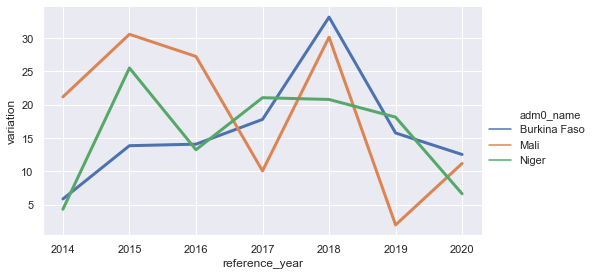

In [27]:
#adm0 Average millet price variation per country each year (FCFA)
sns.relplot(x="reference_year", y="variation", hue="adm0_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=prices);

In [30]:
conflicts = pd.DataFrame({'fatalities' :data.groupby(['adm0_name','reference_year'])['fatalities'].mean()})
conflicts['conflicts'] = pd.DataFrame({'conflicts' :data.groupby(['adm0_name','reference_year'])['conflicts'].mean()})
conflicts.reset_index(inplace=True)
conflicts['severity'] = conflicts['fatalities'] / conflicts['conflicts']
conflicts

,adm0_name,reference_year,fatalities,conflicts,severity
0,Burkina Faso,2014,0.428571,1.000000,0.428571
1,Burkina Faso,2015,0.428571,1.714286,0.250000
2,Burkina Faso,2016,4.571429,2.857143,1.600000
3,Burkina Faso,2017,10.857143,9.857143,1.101449
4,Burkina Faso,2018,26.714286,18.000000,1.484127
5,Burkina Faso,2019,204.142857,46.714286,4.370031
6,Burkina Faso,2020,304.428571,53.142857,5.728495
7,Mali,2014,7.466667,2.733333,2.731707
8,Mali,2015,15.600000,5.066667,3.078947
9,Mali,2016,10.733333,4.800000,2.236111


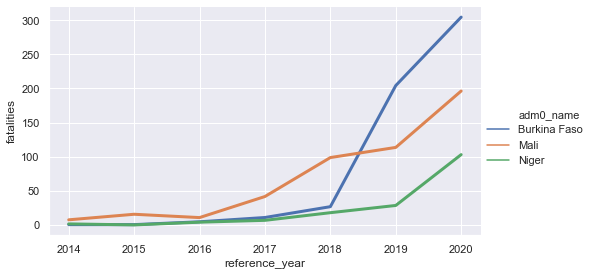

In [31]:
#adm0 Violent conflicts fatalities per country each year
sns.relplot(x="reference_year", y="fatalities", hue="adm0_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=conflicts);

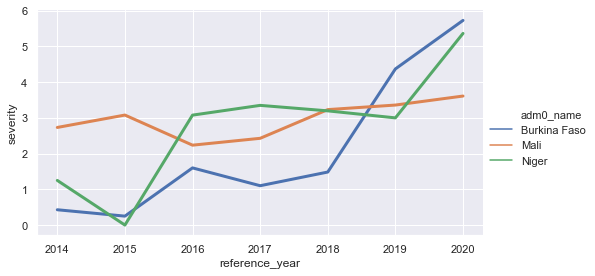

In [32]:
#adm0 Violent conflicts severity per country each year
sns.relplot(x="reference_year", y="severity", hue="adm0_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=conflicts);

In [33]:
idps = pd.DataFrame({'idps' :malidataidps.groupby(['adm0_name','reference_year'])['idps'].mean()})
idps.reset_index(inplace=True)
idps

,adm0_name,reference_year,idps
0,Mali,2014,1138.066667
1,Mali,2015,1630.466667
2,Mali,2016,1216.400000
3,Mali,2017,1410.666667
4,Mali,2018,6227.933333
5,Mali,2019,10684.533333
6,Mali,2020,40068.200000


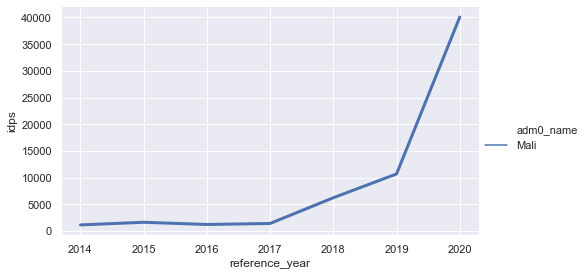

In [34]:
#adm0 IDPs in Mali each year
sns.relplot(x="reference_year", y="idps", hue="adm0_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=idps);

# METHODOLOGY CHAPTER

Table 3.1 in analysis.ipynb: Table most food insecure provinces dimensions in 2020